# Final Project

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

In [17]:
df = pd.read_csv("NYPD_Arrests_Data__Historic_.csv")

dataset resource https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u
List of every arrest in NYC going back to 2006 through the end of the previous calendar year. This is a breakdown of every arrest effected in NYC by the NYPD going back to 2006 through the end of the previous calendar year. This data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning before being posted on the NYPD website. Each record represents an arrest effected in NYC by the NYPD and includes information about the type of crime, the location and time of enforcement.
In addition, information related to suspect demographics is also included.
This data can be used by the public to explore the nature of police enforcement activity.
Please refer to the attached data footnotes for additional information about this dataset.

In [13]:
df

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat
0,236791704,11/22/2021,NaN,NaN,M,M,45-64,M,BLACK,40.799009,-73.952409,POINT (-73.95240854099995 40.799008797000056)
1,237354740,12/04/2021,RAPE 3,RAPE,F,B,25-44,M,WHITE HISPANIC,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
2,236081433,11/09/2021,"CHILD, ENDANGERING WELFARE",SEX CRIMES,M,Q,25-44,M,BLACK,40.679700,-73.776047,POINT (-73.77604736799998 40.67970040800003)
3,32311380,06/18/2007,"CONTROLLED SUBSTANCE, POSSESSION 7",DANGEROUS DRUGS,M,Q,18-24,M,BLACK,NaN,NaN,NaN
4,192799737,01/26/2019,SEXUAL ABUSE,SEX CRIMES,F,M,45-64,M,BLACK,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)
...,...,...,...,...,...,...,...,...,...,...,...,...
5498645,255851599,12/13/2022,"TRAFFIC,UNCLASSIFIED INFRACTIO",OTHER TRAFFIC INFRACTION,M,M,25-44,M,BLACK,40.822167,-73.942415,POINT (-73.94241483 40.82216691)
5498646,256469262,12/16/2022,CRIMINAL CONTEMPT 1,MISCELLANEOUS PENAL LAW,F,B,25-44,M,BLACK,40.853578,-73.900591,POINT (-73.900591 40.853578)
5498647,260305039,12/20/2022,"GAMBLING, DEVICE, POSSESSION",GAMBLING,M,K,25-44,F,ASIAN / PACIFIC ISLANDER,40.638420,-74.008307,POINT (-74.008307 40.63842)
5498648,255843041,12/13/2022,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,M,45-64,M,ASIAN / PACIFIC ISLANDER,40.715917,-73.993111,POINT (-73.993111 40.715917)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5498650 entries, 0 to 5498649
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ARREST_KEY   int64  
 1   ARREST_DATE  object 
 2   PD_DESC      object 
 3   OFNS_DESC    object 
 4   LAW_CAT_CD   object 
 5   ARREST_BORO  object 
 6   AGE_GROUP    object 
 7   PERP_SEX     object 
 8   PERP_RACE    object 
 9   Latitude     float64
 10  Longitude    float64
 11  Lon_Lat      object 
dtypes: float64(2), int64(1), object(9)
memory usage: 503.4+ MB


In [18]:
df = df.drop(["PD_DESC",'PD_CD', 'KY_CD', 'LAW_CODE','ARREST_PRECINCT','JURISDICTION_CODE', 'X_COORD_CD',"Y_COORD_CD"], axis=1)


In [20]:
df

,ARREST_KEY,ARREST_DATE,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat
0,236791704,11/22/2021,NaN,M,M,45-64,M,BLACK,40.799009,-73.952409,POINT (-73.95240854099995 40.799008797000056)
1,237354740,12/04/2021,RAPE,F,B,25-44,M,WHITE HISPANIC,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
2,236081433,11/09/2021,SEX CRIMES,M,Q,25-44,M,BLACK,40.679700,-73.776047,POINT (-73.77604736799998 40.67970040800003)
3,32311380,06/18/2007,DANGEROUS DRUGS,M,Q,18-24,M,BLACK,NaN,NaN,NaN
4,192799737,01/26/2019,SEX CRIMES,F,M,45-64,M,BLACK,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)
...,...,...,...,...,...,...,...,...,...,...,...
5498645,255851599,12/13/2022,OTHER TRAFFIC INFRACTION,M,M,25-44,M,BLACK,40.822167,-73.942415,POINT (-73.94241483 40.82216691)
5498646,256469262,12/16/2022,MISCELLANEOUS PENAL LAW,F,B,25-44,M,BLACK,40.853578,-73.900591,POINT (-73.900591 40.853578)
5498647,260305039,12/20/2022,GAMBLING,M,K,25-44,F,ASIAN / PACIFIC ISLANDER,40.638420,-74.008307,POINT (-74.008307 40.63842)
5498648,255843041,12/13/2022,ASSAULT 3 & RELATED OFFENSES,M,M,45-64,M,ASIAN / PACIFIC ISLANDER,40.715917,-73.993111,POINT (-73.993111 40.715917)


In [22]:
df['AGE_GROUP'].describe()

count     5498633
unique         91
top         25-44
freq      2591894
Name: AGE_GROUP, dtype: object

Details about case description

In [21]:
df['OFNS_DESC'].describe()

count             5489481
unique                 90
top       DANGEROUS DRUGS
freq              1109839
Name: OFNS_DESC, dtype: object

<Axes: >

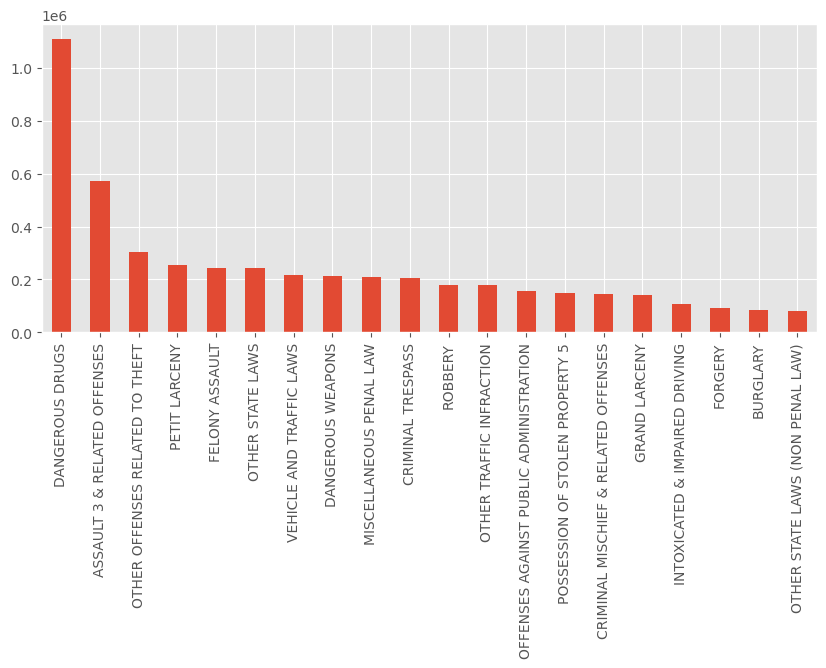

In [27]:
df['OFNS_DESC'].value_counts().head(20).plot(kind='bar')

In [ ]:
df.groupby("OFNS_DESC").plot(kind="scatter", x="ARREST_DATE")